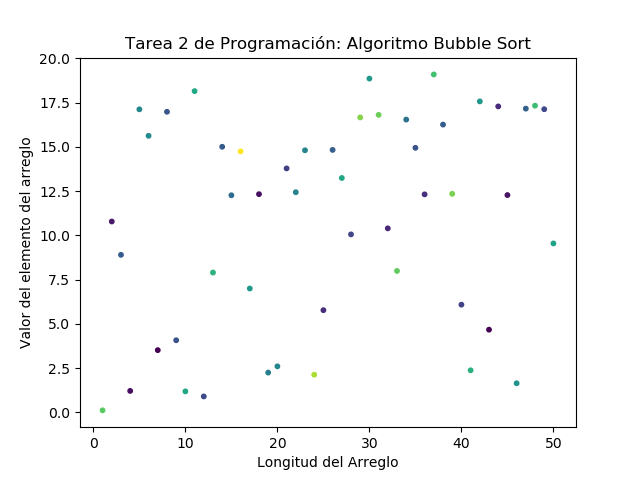

In [35]:
#BUBBLE SORT

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import sys
from celluloid import Camera
from matplotlib.animation import PillowWriter

NumPuntos = 50


valores, color = np.random.random((2, NumPuntos))
valores = valores*20
TamanioArreglo = valores.shape[0]
ejex = np.array(range(1,TamanioArreglo+1))

#Creacion de la figura
fig = plt.figure(1)
scat = plt.scatter(ejex, valores, c = color, s=10)
plt.title('Tarea 2 de Programación: Algoritmo Bubble Sort')
plt.xlabel('Longitud del Arreglo')
plt.ylabel('Valor del elemento del arreglo')
# camera = Camera(fig)

#Actualizacion del grafico
def update_plot(g):
    lista=[]
    for i in g:
        lista.append(i)
    y = np.array(lista)
    d = np.hstack((ejex[:,np.newaxis], y[:,np.newaxis]))
    scat.set_offsets(d)
#     camera.snap()
    return scat,
    
#Algoritmo BS
def bubbleSort(data):
    for l in range(len(data)):
        for i in range(len(data)):
            if i < (len(data)) - 1:
                if data[i] > data[i + 1]:
                    data[i], data[i + 1] = data[i + 1], data[i]
                    yield data
    
generator = bubbleSort(valores.tolist())
ani = animation.FuncAnimation(fig, update_plot, frames=generator,interval=1,
        repeat=True, save_count = 100, blit = True) #save_count = 100,cache_frame_data = True

# writer = PillowWriter(fps=24)  
# ani.save("BubbleSort2.gif", writer=writer) 
# ani.save('b.mp4', fps = 1000)
plt.show()



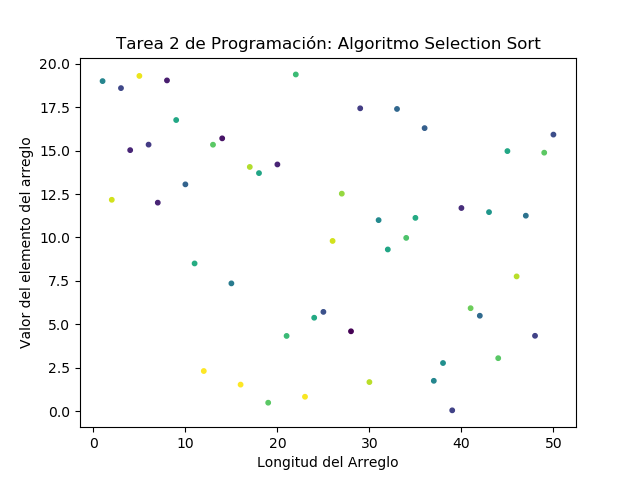

In [36]:
# SELECTION SORT

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import sys

NumPuntos = 50

valores, color = np.random.random((2, NumPuntos))
valores = valores*20
TamanioArreglo = valores.shape[0]
ejex = np.array(range(1,TamanioArreglo+1))

#Creacion de la figura
fig = plt.figure(1)
scat = plt.scatter(ejex, valores, c = color, s=10)
plt.title('Tarea 2 de Programación: Algoritmo Selection Sort')
plt.xlabel('Longitud del Arreglo')
plt.ylabel('Valor del elemento del arreglo')

#Actualizacion del grafico
def update_plot(g):
    lista=[]
    for i in g:
        lista.append(i)
    y = np.array(lista)
    d = np.hstack((ejex[:,np.newaxis], y[:,np.newaxis]))
    scat.set_offsets(d)
    return scat,
    
#Algoritmo SS

def swap(A, i, j):
    if i != j:
        A[i], A[j] = A[j], A[i]

def selectionsort(A):
    if len(A) == 1:
        return

    for i in range(len(A)):
        # Find minimum unsorted value.
        minVal = A[i]
        minIdx = i
        for j in range(i, len(A)):
            if A[j] < minVal:
                minVal = A[j]
                minIdx = j
            yield A
        swap(A, i, minIdx)
        yield A
    
generator = selectionsort(valores.tolist())
ani = animation.FuncAnimation(fig, update_plot, frames=generator,interval=1,
        repeat=True, save_count = 100)

plt.show()

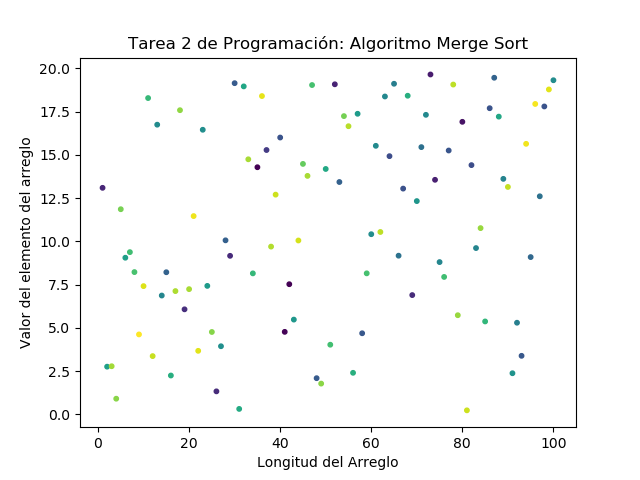

In [37]:
# MERGE SORT

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import sys

NumPuntos = 100

valores, color = np.random.random((2, NumPuntos))
valores = valores*20
TamanioArreglo = valores.shape[0]
ejex = np.array(range(1,TamanioArreglo+1))

#Creacion de la figura
fig = plt.figure(1)
scat = plt.scatter(ejex, valores, c = color, s=10)
plt.title('Tarea 2 de Programación: Algoritmo Merge Sort')
plt.xlabel('Longitud del Arreglo')
plt.ylabel('Valor del elemento del arreglo')

#Actualizacion del grafico
def update_plot(g):
    lista=[]
    for i in g:
        lista.append(i)
    y = np.array(lista)
    d = np.hstack((ejex[:,np.newaxis], y[:,np.newaxis]))
    scat.set_offsets(d)
    return scat,
    
#Algoritmo MS
def mergesort(A, start, end):

    if end <= start:
        return

    mid = start + ((end - start + 1) // 2) - 1
    yield from mergesort(A, start, mid)
    yield from mergesort(A, mid + 1, end)
    yield from merge(A, start, mid, end)
    yield A

def merge(A, start, mid, end):
    
    merged = []
    leftIdx = start
    rightIdx = mid + 1

    while leftIdx <= mid and rightIdx <= end:
        if A[leftIdx] < A[rightIdx]:
            merged.append(A[leftIdx])
            leftIdx += 1
        else:
            merged.append(A[rightIdx])
            rightIdx += 1

    while leftIdx <= mid:
        merged.append(A[leftIdx])
        leftIdx += 1

    while rightIdx <= end:
        merged.append(A[rightIdx])
        rightIdx += 1

    for i, sorted_val in enumerate(merged):
        A[start + i] = sorted_val
        yield A
    
generator = mergesort(valores.tolist(), 0, TamanioArreglo - 1)
ani = animation.FuncAnimation(fig, update_plot, frames=generator,interval=1,
        repeat=True)
plt.show()

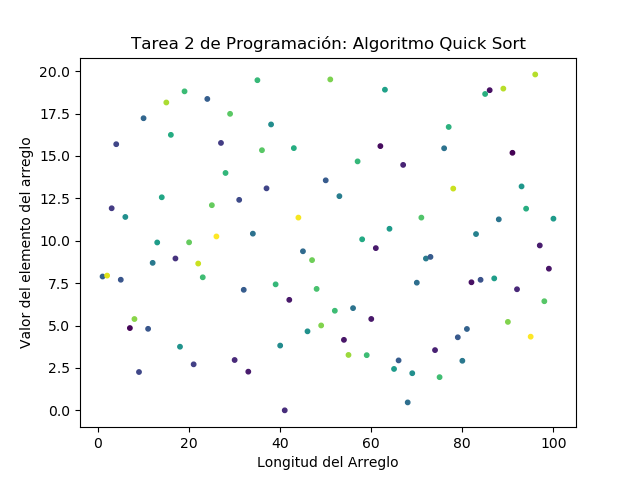

In [38]:
# Quick SORT

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import sys

NumPuntos = 100

valores, color = np.random.random((2, NumPuntos))
valores = valores*20
TamanioArreglo = valores.shape[0]
ejex = np.array(range(1,TamanioArreglo+1))

#Creacion de la figura
fig = plt.figure(1)
scat = plt.scatter(ejex, valores, c = color, s=10)
plt.title('Tarea 2 de Programación: Algoritmo Quick Sort')
plt.xlabel('Longitud del Arreglo')
plt.ylabel('Valor del elemento del arreglo')

#Actualizacion del grafico
def update_plot(g):
    lista=[]
    for i in g:
        lista.append(i)
    y = np.array(lista)
    d = np.hstack((ejex[:,np.newaxis], y[:,np.newaxis]))
    scat.set_offsets(d)
    return scat,
    
#Algoritmo QS
def swap(A, i, j):
    if i != j:
        A[i], A[j] = A[j], A[i]

def quicksort(A, start, end):
    """In-place quicksort."""

    if start >= end:
        return

    pivot = A[end]
    pivotIdx = start

    for i in range(start, end):
        if A[i] < pivot:
            swap(A, i, pivotIdx)
            pivotIdx += 1
        yield A
    swap(A, end, pivotIdx)
    yield A

    yield from quicksort(A, start, pivotIdx - 1)
    yield from quicksort(A, pivotIdx + 1, end)
    
generator = quicksort(valores.tolist(), 0, TamanioArreglo - 1)
ani = animation.FuncAnimation(fig, update_plot, frames=generator,interval=1,
        repeat=True)

plt.show()

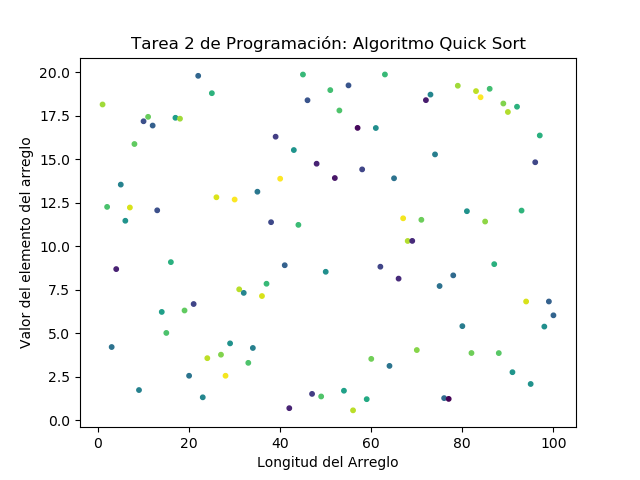

In [23]:
# Heap SORT

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import sys

NumPuntos = 100

valores, color = np.random.random((2, NumPuntos))
valores = valores*20
TamanioArreglo = valores.shape[0]
ejex = np.array(range(1,TamanioArreglo+1))

#Creacion de la figura
fig = plt.figure(1)
scat = plt.scatter(ejex, valores, c = color, s=10)
plt.title('Tarea 2 de Programación: Algoritmo Quick Sort')
plt.xlabel('Longitud del Arreglo')
plt.ylabel('Valor del elemento del arreglo')

#Actualizacion del grafico
def update_plot(g):
    lista=[]
    for i in g:
        lista.append(i)
    y = np.array(lista)
    d = np.hstack((ejex[:,np.newaxis], y[:,np.newaxis]))
    scat.set_offsets(d)
    return scat,
    
#Algoritmo HS
def heapify(unsorted, index, heap_size):
    largest = index
    left_index = 2 * index + 1
    right_index = 2 * index + 2
    if left_index < heap_size and unsorted[left_index] > unsorted[largest]:
        largest = left_index

    if right_index < heap_size and unsorted[right_index] > unsorted[largest]:
        largest = right_index

    if largest != index:
        unsorted[largest], unsorted[index] = unsorted[index], unsorted[largest]   
        yield unsorted
        heapify(unsorted, largest, heap_size)

def heap_sort(unsorted):
    n = len(unsorted)
    for i in range(n // 2 - 1, -1, -1):
        heapify(unsorted, i, n)
    for i in range(n - 1, 0, -1):
        unsorted[0], unsorted[i] = unsorted[i], unsorted[0]
        yield from heapify(unsorted, 0, i)
    yield unsorted
    
generator = bubbleSort(valores.tolist())
ani = animation.FuncAnimation(fig, update_plot, frames=generator,interval=1,
        repeat=True)
plt.show()

In [40]:
def heapify(unsorted, index, heap_size):
    largest = index
    left_index = 2 * index + 1
    right_index = 2 * index + 2
    if left_index < heap_size and unsorted[left_index] > unsorted[largest]:
        largest = left_index

    if right_index < heap_size and unsorted[right_index] > unsorted[largest]:
        largest = right_index

    if largest != index:
        unsorted[largest], unsorted[index] = unsorted[index], unsorted[largest]        
        heapify(unsorted, largest, heap_size)
        


def heap_sort(unsorted):

    n = len(unsorted)
    for i in range(n // 2 - 1, -1, -1):
        yield from heapify(unsorted, i, n)
    for i in range(n - 1, 0, -1):
        unsorted[0], unsorted[i] = unsorted[i], unsorted[0]
        yield from heapify(unsorted, 0, i)
heap_sort([9,8,7,6])

<generator object heap_sort at 0x000001FFDA60E3C0>

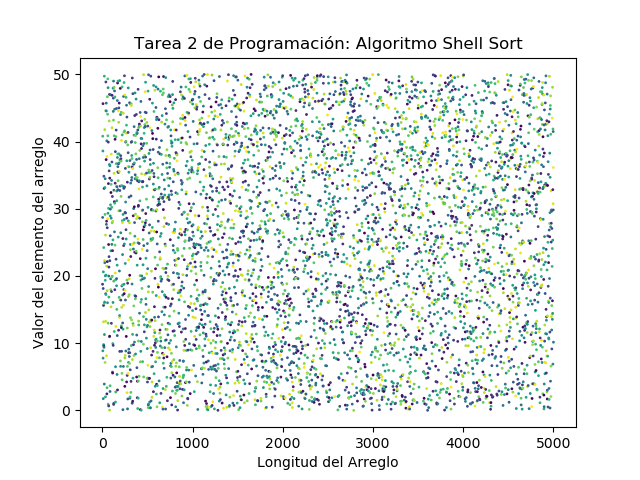

In [39]:
# SHELL SORT

%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import sys

NumPuntos = 5000

valores, color = np.random.random((2, NumPuntos))
valores = valores*50
TamanioArreglo = valores.shape[0]
ejex = np.array(range(1,TamanioArreglo+1))

#Creacion de la figura
fig = plt.figure(1)
scat = plt.scatter(ejex, valores, c = color, s=1)
plt.title('Tarea 2 de Programación: Algoritmo Shell Sort')
plt.xlabel('Longitud del Arreglo')
plt.ylabel('Valor del elemento del arreglo')

#Actualizacion del grafico
def update_plot(g):
    lista=[]
    for i in g:
        lista.append(i)
    y = np.array(lista)
    d = np.hstack((ejex[:,np.newaxis], y[:,np.newaxis]))
    scat.set_offsets(d)
    return scat,
    
#Algoritmo SS
def shell_sort(lst):

    split_point = len(lst) // 2   
    while split_point > 0:

        for i in range(split_point, len(lst)):
            temp = lst[i]
            j = i

            while j >= split_point and lst[j - split_point] > temp:    
                lst[j] = lst[j - split_point]
                j = j - split_point
            lst[j] = temp

        split_point = split_point // 2      
        yield lst
    
generator = shell_sort(valores.tolist())
ani = animation.FuncAnimation(fig, update_plot, frames=generator,interval=1500,
        repeat=True)
plt.show()